In [1]:
from collections import Counter
import pandas as pd
import re
import spacy, en_core_web_sm

Read generated features files to pandas

In [2]:
pd.read_csv('/Users/admin/Arvini/Suppliers prices/csv/ax_test2/vialard_2015_01_05_fine_wines_price_list.csv.tar.gz', header=None)

,0,1,2,3,4,5,6,7
0,vialard_2015_01_05_fine_wines_price_list.csv,NaN,2011,NaN,38 x 12,5.10,source_index,unknown_column
1,z de luc thienpont,NaN,2011,NaN,1000 x 12,3.90,11,bordeaux
2,aile d'argent de ch. mouton rothschild,NaN,2006,NaN,1 x 1,45.00,14,bordeaux blanc
3,blanc de lynch bages,NaN,2013,NaN,10 x 6,30.00,24,bordeaux blanc
4,caillou blanc de talbot,NaN,2013,NaN,3 x 12,15.60,26,bordeaux blanc
5,clos des lunes - lune d'argent,NaN,2013,NaN,74 x 6,8.10,28,bordeaux blanc
6,cos d'estournel blanc,NaN,2012,NaN,8 x 6,44.00,30,bordeaux blanc
7,doisy daene sec,NaN,2003,NaN,2 x 12,10.00,32,bordeaux blanc
8,g de guiraud,NaN,2013,NaN,100 x 6,7.30,41,bordeaux blanc
9,opalie de ch. coutet,NaN,2011,NaN,7 x 6,25.00,43,bordeaux blanc


In [3]:
DATA_DIR = '/Users/admin/edu/NLP/practical_NLP_course/data/'

In [27]:
header = ['sent_cnt', 'token_cnt', 'word_cnt', 'title_cnt', 'caps_cnt', 'number_cnt', 'smiles_cnt', 'punct_cnt', 'uniq_cnt',
          'punct_rate', 'punct_sent_rate', 'token_per_sent', 'word_rate', 'uniq_rate', 'title_rate', 'caps_rate',
          'verb_rate', 'adj_rate', 'pron_rate', 'noun_rate', 'adv_rate', 'det_rate', 'conj_rate', 'unkn_rate',
          'PUNCT', 'SYM', 'X ', 'ADJ', 'VERB', 'CONJ', 'NUM', 'DET', 'ADV', 'ADP', 'NOUN', 
          'PROPN', 'PART', 'PRON', 'INTJ', 
          'label']

In [142]:
cnt_features = ['sent_cnt', 'token_cnt', 'word_cnt', 'title_cnt', 'caps_cnt', 'number_cnt', 'smiles_cnt', 'punct_cnt', 'uniq_cnt']
pos_features = ['PUNCT', 'SYM', 'X ', 'ADJ', 'VERB', 'CONJ', 'NUM', 'DET', 'ADV', 'ADP', 'NOUN', 'PROPN', 'PART', 'PRON', 'INTJ']
rate_features = ['punct_rate', 'punct_sent_rate', 'token_per_sent', 'word_rate', 'uniq_rate', 'title_rate', 'caps_rate',
                 'verb_rate', 'adj_rate', 'pron_rate', 'noun_rate', 'adv_rate', 'det_rate', 'conj_rate', 'unkn_rate',]

In [75]:
data = pd.read_csv(DATA_DIR+'en_features.tsv', header=None, delimiter='\t', names=header)

In [76]:
data.describe()

,sent_cnt,token_cnt,word_cnt,title_cnt,caps_cnt,number_cnt,smiles_cnt,punct_cnt,uniq_cnt,punct_rate,...,CONJ,NUM,DET,ADV,ADP,NOUN,PROPN,PART,PRON,INTJ
count,489671.000000,489671.000000,489671.000000,489671.000000,489671.00000,489671.000000,489671.000000,489671.000000,489671.000000,489671.000000,...,489671.0,489671.000000,489671.000000,489671.000000,489671.000000,489671.000000,489671.000000,489671.00000,489671.000000,489671.000000
mean,18.946117,257.687607,212.779777,27.297340,9.98337,1.674326,0.019186,35.362558,100.994864,0.144215,...,0.0,3.067072,18.225968,19.556233,22.985596,40.123932,10.352504,7.15299,21.600799,2.141199
std,24.648957,318.496837,263.193653,40.052776,17.09216,5.762642,0.175004,51.561213,91.868166,0.068247,...,0.0,7.374484,24.597679,25.042994,30.672452,51.585881,20.498080,9.47717,29.103098,4.213927
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.000000,58.000000,46.000000,4.000000,1.00000,0.000000,0.000000,8.000000,34.000000,0.108108,...,0.0,0.000000,3.000000,3.000000,4.000000,9.000000,1.000000,1.00000,3.000000,0.000000
50%,12.000000,160.000000,131.000000,15.000000,5.00000,0.000000,0.000000,21.000000,79.000000,0.134752,...,0.0,1.000000,10.000000,12.000000,13.000000,24.000000,4.000000,4.00000,12.000000,1.000000
75%,24.000000,337.000000,279.000000,36.000000,13.00000,2.000000,0.000000,45.000000,140.000000,0.166667,...,0.0,4.000000,24.000000,26.000000,30.000000,52.000000,12.000000,10.00000,29.000000,3.000000
max,912.000000,11252.000000,4126.000000,2142.000000,1553.00000,607.000000,67.000000,11252.000000,1316.000000,1.000000,...,0.0,607.000000,448.000000,464.000000,500.000000,1344.000000,1682.000000,175.00000,991.000000,276.000000


As we can see from the described data we have to normalize count columns to have better data for the input model if we are going to use Linear Models

In [78]:
data.columns

Index(['sent_cnt', 'token_cnt', 'word_cnt', 'title_cnt', 'caps_cnt',
       'number_cnt', 'smiles_cnt', 'punct_cnt', 'uniq_cnt', 'punct_rate',
       'punct_sent_rate', 'token_per_sent', 'word_rate', 'uniq_rate',
       'title_rate', 'caps_rate', 'verb_rate', 'adj_rate', 'pron_rate',
       'noun_rate', 'adv_rate', 'det_rate', 'conj_rate', 'unkn_rate', 'PUNCT',
       'SYM', 'X ', 'ADJ', 'VERB', 'CONJ', 'NUM', 'DET', 'ADV', 'ADP', 'NOUN',
       'PROPN', 'PART', 'PRON', 'INTJ', 'label'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1),
                                                    data['label'],
                                                    test_size=0.25,
                                                    random_state=42)

In [85]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_scaled = pd.DataFrame(min_max_scaler.transform(X_train), columns=header[:-1])
X_train_scaled.head()

,sent_cnt,token_cnt,word_cnt,title_cnt,caps_cnt,number_cnt,smiles_cnt,punct_cnt,uniq_cnt,punct_rate,...,CONJ,NUM,DET,ADV,ADP,NOUN,PROPN,PART,PRON,INTJ
0,0.006452,0.006488,0.016819,0.003268,0.000000,0.000000,0.0,0.001155,0.028875,0.178082,...,0.0,0.001647,0.013393,0.008989,0.016,0.008185,0.000000,0.011429,0.012618,0.000000
1,0.024516,0.052257,0.128563,0.034547,0.035982,0.004942,0.0,0.005954,0.121581,0.113946,...,0.0,0.011532,0.058036,0.114607,0.094,0.048363,0.003567,0.120000,0.127760,0.054348
2,0.041290,0.036882,0.100342,0.020075,0.012744,0.000000,0.0,0.003910,0.123100,0.106024,...,0.0,0.001647,0.060268,0.067416,0.092,0.049851,0.001784,0.097143,0.058360,0.018116
3,0.016774,0.024529,0.068985,0.012605,0.007496,0.003295,0.0,0.002311,0.104103,0.094203,...,0.0,0.004942,0.029018,0.047191,0.060,0.029762,0.002378,0.080000,0.047319,0.003623
4,0.009032,0.009687,0.024515,0.007937,0.008246,0.000000,0.0,0.001422,0.042553,0.146789,...,0.0,0.000000,0.004464,0.022472,0.020,0.009673,0.000595,0.017143,0.023659,0.003623


## Prepare Logistic Regression

### Train

In [86]:
from sklearn.linear_model import LogisticRegressionCV

LogisticRegressionCV (with additional CV) - is the LogisticRegression but for the grid of Cs values (that are set by default to be ten values in a logarithmic scale between 1e-4 and 1e4), the best hyperparameter is selected by the cross-validator StratifiedKFold

In [89]:
clf_lr = LogisticRegressionCV(multi_class='multinomial', n_jobs=4)
clf_lr.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=4, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Get the most valuebles features by class

In [125]:
import numpy as np

labels = sorted(y_train.unique())

tops = []
for i, class_label in enumerate(labels):
    top10 = np.argsort(clf_lr.coef_[i])[-10:]
    tops.append(top10)
    print('{}: features: \n{}\n\n'.format(class_label, '\n'.join(header[x] for x in top10)))
    
# for c in tops:
    

17F: features: 
word_rate
token_cnt
caps_rate
pron_rate
ADV
PRON
word_cnt
PROPN
sent_cnt
INTJ


17M: features: 
punct_sent_rate
pron_rate
VERB
NUM
caps_rate
ADV
word_cnt
sent_cnt
PROPN
INTJ


25F: features: 
number_cnt
pron_rate
PART
ADP
NOUN
caps_cnt
uniq_cnt
smiles_cnt
ADJ
PRON


25M: features: 
ADP
NUM
conj_rate
VERB
det_rate
title_cnt
title_rate
caps_cnt
X 
DET


48F: features: 
punct_cnt
ADJ
PART
uniq_cnt
number_cnt
caps_cnt
PRON
NOUN
title_rate
title_cnt


48M: features: 
conj_rate
SYM
NUM
X 
caps_cnt
token_per_sent
VERB
title_rate
title_cnt
DET




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Evaluate

In [96]:
X_test_scaled = pd.DataFrame(min_max_scaler.transform(X_test), columns=header[:-1])
predictions_lr = clf_lr.predict(X_test_scaled)

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_fscore_support, f1_score, roc_auc_score, roc_curve, auc

In [127]:
print('Accuracy:', accuracy_score(y_test, predictions_lr))
print()
print('Precision weighted:', precision_score(y_test, predictions_lr, average='weighted'))
print('Recall weighted:', recall_score(y_test, predictions_lr, average='weighted'))
print('F1 score weighted:', f1_score(y_test, predictions_lr, average='weighted'))
print()
print('Precision macro:', precision_score(y_test, predictions_lr, average='macro'))
print('Recall macro:', recall_score(y_test, predictions_lr, average='macro'))
print('F1 score macro:', f1_score(y_test, predictions_lr, average='macro'))

Accuracy: 0.2997353330392589

Precision weighted: 0.2784046306343467
Recall weighted: 0.2997353330392589
F1 score weighted: 0.2618097256941821

Precision macro: 0.27638493641289047
Recall macro: 0.2915788044975688
F1 score macro: 0.2553532822197222


In [129]:
conf_matrix_temp = confusion_matrix(y_test, predictions_lr, labels=labels)
conf_matrix_lr = pd.DataFrame(conf_matrix_temp, columns=labels, index=labels)

In [130]:
conf_matrix_lr

,17F,17M,25F,25M,48F,48M
17F,12998,3577,2488,211,634,2198
17M,7823,5452,2837,456,776,4608
25F,5089,3620,5144,501,1378,5412
25M,2643,3437,3032,682,1061,8106
48F,3253,2864,4156,429,1571,6224
48M,1831,2819,2567,622,1073,10846


In [131]:
supp_matrix_temp = [list(x) for x in precision_recall_fscore_support(y_test, predictions_lr, labels=labels)]
supp_matrix_lr = pd.DataFrame(supp_matrix_temp, columns=labels, 
                                    index=['precision', 'recall', 'f1', 'total'])

In [132]:
supp_matrix_lr

,17F,17M,25F,25M,48F,48M
precision,0.386420,0.250448,0.254351,0.235091,0.241953,0.290047
recall,0.587985,0.248360,0.243284,0.035969,0.084933,0.548942
f1,0.466355,0.249400,0.248695,0.062391,0.125730,0.379549
total,22106.000000,21952.000000,21144.000000,18961.000000,18497.000000,19758.000000


Let's calculate ROC AUC average for the classes and for the each class

In [138]:
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=labels)
y_pr_bin = label_binarize(predictions_lr, classes=labels)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pr_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_pr_bin.ravel(), pos_label=2)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


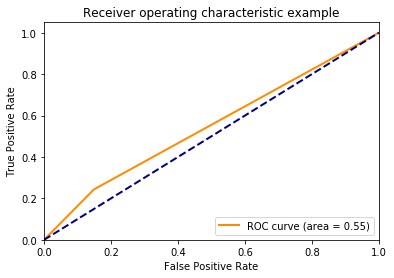

In [139]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [140]:
fpr

{0: array([0.        , 0.20574807, 1.        ]),
 1: array([0.        , 0.16241315, 1.        ]),
 2: array([0.        , 0.14890298, 1.        ]),
 3: array([0.        , 0.02144852, 1.        ]),
 4: array([0.       , 0.0473629, 1.       ]),
 5: array([0.        , 0.25860121, 1.        ]),
 'micro': array([0.        , 0.16666667, 1.        ])}

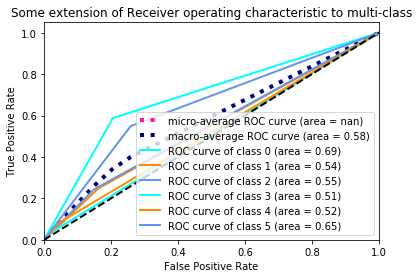

In [141]:
import numpy as np
from scipy import interp
from itertools import cycle

n_classes = 6

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()